## Week 2 Exercise - Xin SHEN
### Classification on Breast Cancer

In [2]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
breast_cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [3]:
breast_cancer['data'].shape

(569, 30)

In [4]:
breast_cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
breast_cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

### Use 2/3 of the data as labeled data

Text(0.5,1,'Breast Cancer Real [Target]')

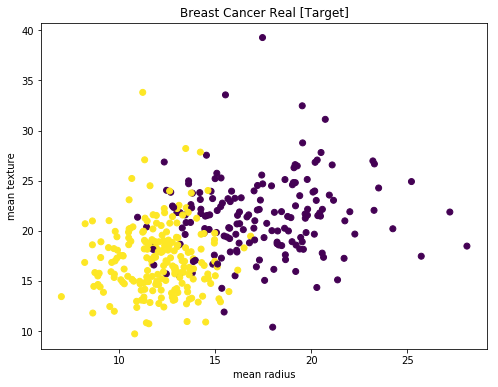

In [70]:
import matplotlib.pyplot as plt

labeledData = breast_cancer['data'][:len(breast_cancer['data'])//3*2,0:2]

x1 = labeledData[:,0]
x2 = labeledData[:,1]
y  = breast_cancer['target'][:len(breast_cancer['data'])//3*2]

plt.figure(figsize=(8,6))
plt.scatter(x1,x2,c=y)
plt.xlabel(breast_cancer['feature_names'][0])
plt.ylabel(breast_cancer['feature_names'][1])
plt.title('Breast Cancer Real [Target]')

### Test the rest of 1/3 data to show KNN Accuracy

Text(0.5,1,'Breast Cancer Test Result [Target] ')

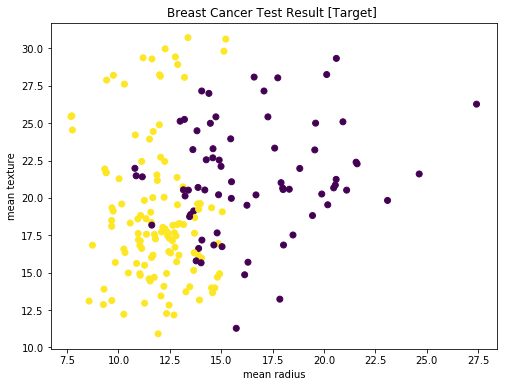

In [73]:
import numpy as np

testDataSet = breast_cancer['data'][len(breast_cancer['data'])//3*2:,0:2]

def classify(x,y):
    distances = np.sum((labeledData - [x,y])**2, axis = 1)
    idx_closest = np.argmin(distances)
    return breast_cancer['target'][idx_closest]

testResults = [classify(d[0],d[1]) for d in testDataSet]

plt.figure(figsize=(8,6))
plt.scatter(testDataSet[:,0],testDataSet[:,1],c=testResults)
plt.xlabel(breast_cancer['feature_names'][0])
plt.ylabel(breast_cancer['feature_names'][1])
plt.title('Breast Cancer Test Result [Target] ')

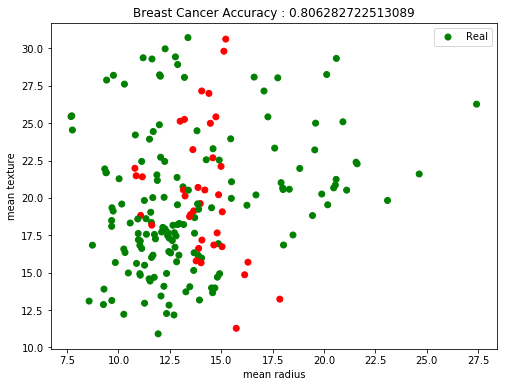

In [120]:
def mapColor(x):
    if(x==True):
        return 'g'
    else:
        return 'r'

realResults = breast_cancer['target'][len(breast_cancer['data'])//3*2:]
accuracyArr = realResults == testResults
accuracyColor = [mapColor(x) for x in accuracyArr]

realcount = np.sum([int(x) for x in accuracyArr],axis=0)
accuracy = (realcount / len(accuracyArr))

plt.figure(figsize=(8,6))
plt.scatter(testDataSet[:,0],testDataSet[:,1],c=accuracyColor)
plt.xlabel(breast_cancer['feature_names'][0])
plt.ylabel(breast_cancer['feature_names'][1])
plt.title('Breast Cancer Accuracy : %s' % accuracy)
plt.legend(['Real','Fake'])
plt.show()

